### Ejercicio 1 -TP2 CONTROL 2024

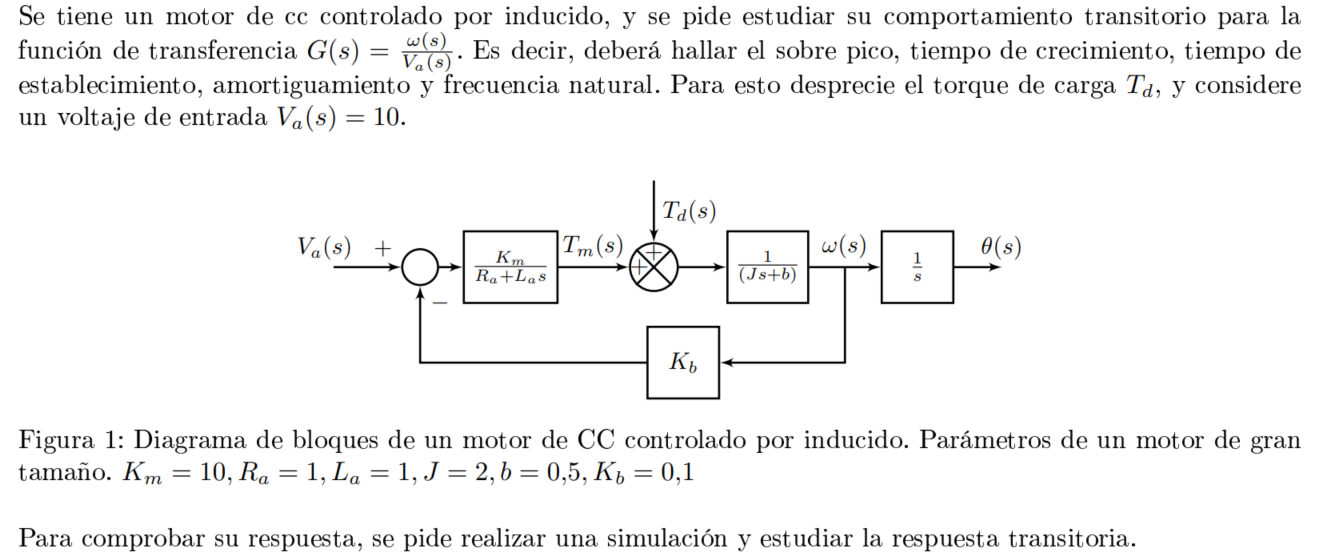

In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd

fuente = {'family': 'fantasy',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        } 


In [2]:
Va, Ra, La, J, Kb, Km, Tm, Td, b, W, J, b, s = sp.symbols('Va, Ra, La, J, Kb, Km, Tm, Td, b, W, J, b, s') 
G = Km/((La*J)*s**2+ (Ra*J + La*b)*s + (Ra*b + Km*Kb))
G

Km/(J*La*s**2 + Kb*Km + Ra*b + s*(J*Ra + La*b))

In [3]:
G = G.subs({Km:10, Ra:1, La:1, J: 2, b:0.5, Kb:0.1})
G

10/(2*s**2 + 2.5*s + 1.5)

In [4]:
H = ct.tf([10],[2,2.5,1.5])
print(H)
print('Polos de la función H(s):', H.poles())
print('Ceros de la función H(s):', H.zeros())
print('Ganancia de la función H(s):', H.dcgain())

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        10
-------------------
2 s^2 + 2.5 s + 1.5

Polos de la función H(s): [-0.625+0.59947894j -0.625-0.59947894j]
Ceros de la función H(s): []
Ganancia de la función H(s): 6.666666666666666


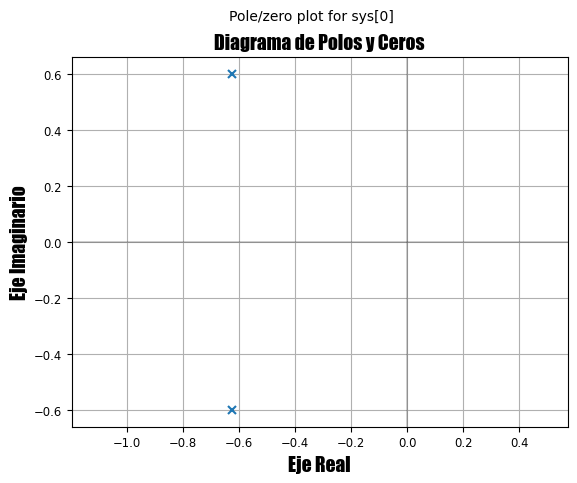

In [5]:
ct.pzmap(H)

plt.title('Diagrama de Polos y Ceros', fontdict=fuente)
plt.xlabel('Eje Real', fuente)
plt.ylabel('Eje Imaginario', fontdict=fuente)
plt.grid()

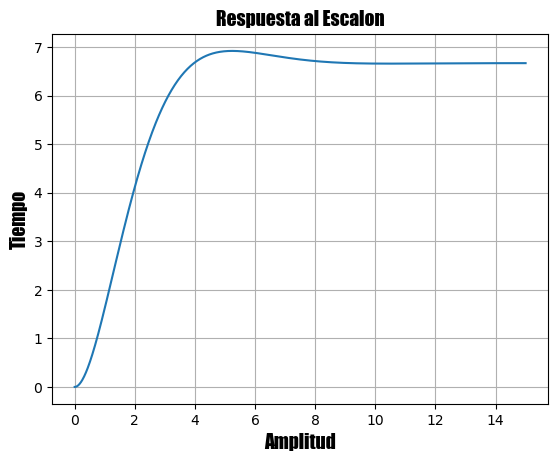

In [41]:
T = np.linspace(0,15,1001)
t,y = ct.step_response(H,T)

plt.plot(t,y)
plt.title('Respuesta al Escalon', fontdict=fuente)
plt.xlabel('Amplitud', fuente)
plt.ylabel('Tiempo', fontdict=fuente)
plt.grid()


In [6]:
info = ct.step_info(H) 

#####################De aca para abajo es solo para armar una tabla mas legible##############################

df_info = pd.DataFrame(list(info.items()), columns=['Propiedad', 'Valor'])

styled_df_info = df_info.style.set_caption("Información de Respuesta al Escalón de H(s)")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16pt'), ('font-weight', 'bold'), ('color', '#ffffff'), ('background-color', '#333333'), ('padding', '10px')]
    }, {
        'selector': 'thead',
        'props': [('font-weight', 'bold'), ('background-color', '#333333'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'thead th',
        'props': [('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'tr:nth-child(even)',
        'props': [('background-color', '#444444'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'tr:nth-child(odd)',
        'props': [('background-color', '#555555'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'td',
        'props': [('text-align', 'center'), ('border', '1px solid #ffffff')]
    }])\
    .set_properties(**{'font-size': '12pt'})
    
styled_df_info


,Propiedad,Valor
0,RiseTime,2.456091
1,SettlingTime,6.921710
2,SettlingMin,6.008465
3,SettlingMax,6.918690
4,Overshoot,3.780353
5,Undershoot,0.000000
6,Peak,6.918690
7,PeakTime,5.247103
8,SteadyStateValue,6.666667


#### Vamos a calcular algunas mediciones 

In [53]:
t,y = ct.step_response(H,T)

final_value = y[-1]
peak_value = np.max(y)  
overshoot = (peak_value - final_value) / final_value * 100  

peak_index = np.argmax(y)
peak_time = T[peak_index]

ten_percent_peak = 0.1 * peak_value
ninety_percent_peak = 0.9 * peak_value


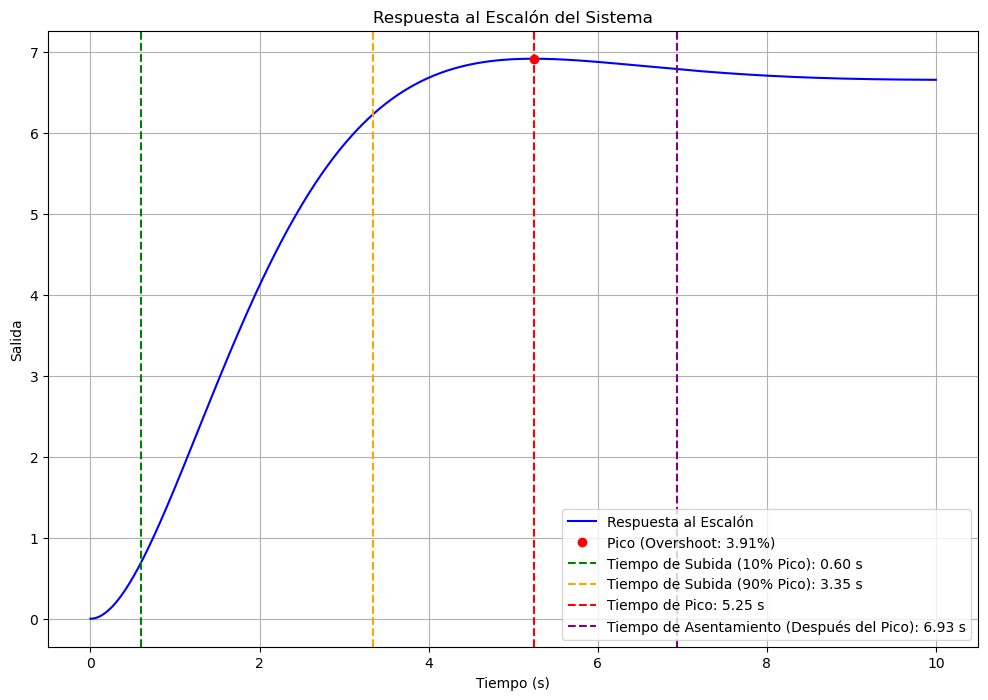

Overshoot: 3.91%
Tiempo de pico: 5.25 segundos
Tiempo de subida: 2.75 segundos (de 0.60 s a 3.35 s)
Tiempo de asentamiento después del pico: 6.93 segundos


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define la función de transferencia
numerador = [10]
denominador = [2, 2.5, 1.5]
H = ctrl.TransferFunction(numerador, denominador)

# Define el tiempo para la simulación
T = np.linspace(0, 10, 500)  # Tiempo de 0 a 10 segundos con 500 puntos

# Obtener la respuesta al escalón
T, y = ctrl.step_response(H, T)

# Calcular el overshoot (porcentaje de sobreimpulso)
final_value = y[-1]  # Valor final de la respuesta
peak_value = np.max(y)  # Valor máximo de la respuesta
overshoot = (peak_value - final_value) / final_value * 100  # Porcentaje de sobreimpulso

# Calcular el tiempo de pico
peak_index = np.argmax(y)
peak_time = T[peak_index]

# Calcular el tiempo de subida (entre el 10% y el 90% del valor pico)
ten_percent_peak = 0.1 * peak_value
ninety_percent_peak = 0.9 * peak_value

# Encuentra los tiempos correspondientes a 10% y 90% del valor pico
rise_start_index = np.where(y >= ten_percent_peak)[0][0]
rise_end_index = np.where(y >= ninety_percent_peak)[0][0]

# Si hay múltiples índices, tomamos el primero que cumple la condición
rise_time_start = T[rise_start_index]
rise_time_end = T[rise_end_index]

rise_time = rise_time_end - rise_time_start

# Calcular el tiempo de asentamiento después del tiempo de pico
# Encuentra los tiempos donde la respuesta entra dentro del 2% del valor final
settling_indices = np.where(np.abs(y - final_value) <= 0.02 * final_value)[0]

# Filtra los índices para aquellos que ocurren después del pico
settling_after_peak_indices = settling_indices[settling_indices > peak_index]

# El primer instante donde la respuesta entra dentro del 2% del valor final después del pico
settling_time = T[settling_after_peak_indices[0]] if len(settling_after_peak_indices) > 0 else np.nan

# Graficar la respuesta al escalón
plt.figure(figsize=(12, 8))
plt.plot(T, y, label='Respuesta al Escalón', color='b')

# Marcar el overshoot
plt.plot(T[peak_index], peak_value, 'ro', label=f'Pico (Overshoot: {overshoot:.2f}%)')

# Marcar el tiempo de subida
plt.axvline(x=rise_time_start, color='g', linestyle='--', label=f'Tiempo de Subida (10% Pico): {rise_time_start:.2f} s')
plt.axvline(x=rise_time_end, color='orange', linestyle='--', label=f'Tiempo de Subida (90% Pico): {rise_time_end:.2f} s')

# Marcar el tiempo de pico
plt.axvline(x=peak_time, color='r', linestyle='--', label=f'Tiempo de Pico: {peak_time:.2f} s')

# Marcar el tiempo de asentamiento después del pico
if not np.isnan(settling_time):
    plt.axvline(x=settling_time, color='purple', linestyle='--', label=f'Tiempo de Asentamiento (Después del Pico): {settling_time:.2f} s')

plt.title('Respuesta al Escalón del Sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los resultados
print(f'Overshoot: {overshoot:.2f}%')
print(f'Tiempo de pico: {peak_time:.2f} segundos')
print(f'Tiempo de subida: {rise_time:.2f} segundos (de {rise_time_start:.2f} s a {rise_time_end:.2f} s)')
print(f'Tiempo de asentamiento después del pico: {settling_time:.2f} segundos')
